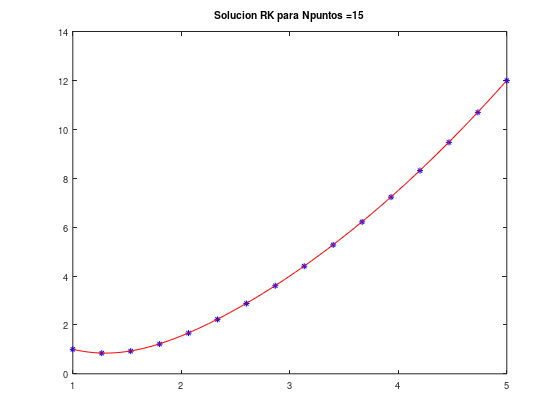

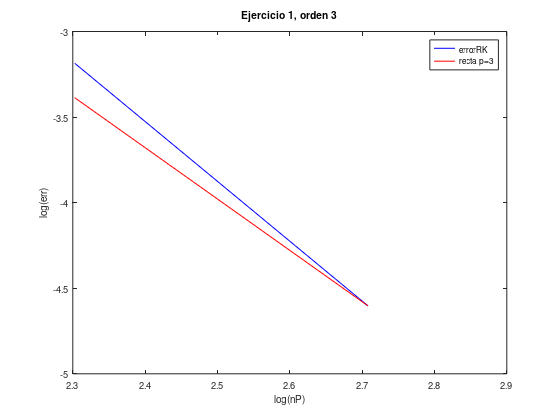

In [4]:
%% Ejercicio 1
%% @author Domingo Méndez
%% Ejecutar desde la carpeta contenedora
  % justo encima de Biblioteca

clear all;
close all;
addpath('../Biblioteca');

%% Orden del método de Runge-Kutta

c = [0 0.5 0.75];
b = (1/9)*[2 3 4];

A = [0 0 0;
0.5 0 0;
0 0.75 0];

% Datos del problema
f = @(t,y) t.^3-2*t.*y;
y0 = 1;

% Sol exacta
g = @(t) 0.5*(t.^2-ones(1,length(t)))+exp(ones(1,length(t))-t.^2);

T = 4;
t0 = 1;

N = 10;
M = 2;

for k = 1 : M % Iteramos para calcular errores
  nP(k) = N;
  [t,y] = RKExp(A, b, c, f, y0, t0, T, N); % Metodo
  ytrue = g(t);
  error(k) = max(abs(ytrue-y));
  figure(1);
  ttrue = t0:0.05:t0+T;
  yplot = g(ttrue);
  plot(t, y, '*b', ttrue, yplot, '-r');
  title(['Solucion RK para Npuntos =', num2str(N)]);
  pause(0.2);

  N = round(1.5*N);
endfor

  figure(2);  % Mostramos la recta pendiente del orden y los errores
  plot(log(nP), log(error), '-b');
  hold on;
  j = M;
  p = 3;
  plot(log(nP(1:j)), -p*log(nP(1:j))+p*log(nP(j))+log(error(j)), '-r');
  legend('errorRK', ['recta p=' num2str(p)], 'Location','Best');
  xlabel('log(nP)');
  ylabel('log(err)');
  title(['Ejercicio 1, orden ' num2str(p) ]);

rmpath('../Biblioteca');

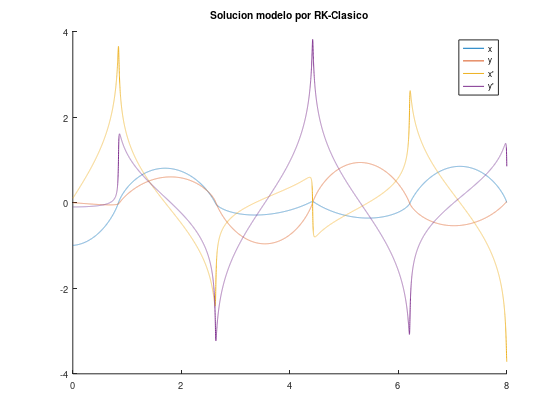

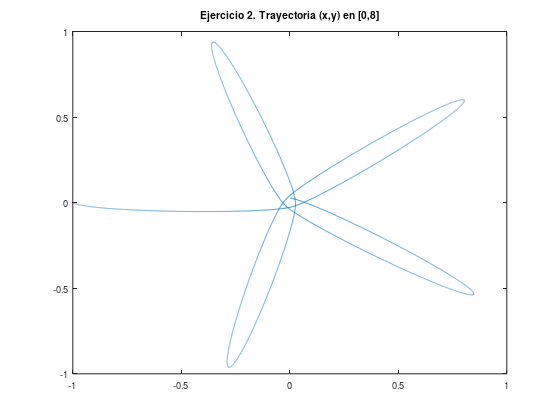

In [5]:
%% Ejercicio 2
%% @author Domingo Méndez
%% Ejecutar desde la carpeta contenedora
  % justo encima de Biblioteca

  clear all;
  close all;
  addpath('../Biblioteca');
  
  %% Inicializacion del problema
  
  N0=10000;
  t0 = 0;
  T = 8;
  
  x0 = -1; %% Sistema de dim 4
  y0 = 0;
  u0 = 0.1;
  v0 = -0.1;
  
  d = 4;  % dimension
  w0 = [x0 y0 u0 v0]; % dato inicial
   % Coefs metodo
  c = [0 0.5 0.5 1];
  b = [1/6 1/3 1/3 1/6];
  A = [0    0   0   0;
       0.5  0   0   0;
       0    0.5 0   0;
       0    0   1   0];
  % funcion del problema
  F = @(t,w) [w(3) w(4) -2*w(1)/(w(1)^2+w(2)^2) -2*w(2)/(w(1)^2+w(2)^2)];
  
  
  N = N0;
  [t, w] = SistemaRKExp(A, b, c, d, F, w0, t0, T, N); %Metodo
  
  figure(1);
  hold on;
  
  for j = 1 : d
    plot(t, w(1:N+1,j), '-');
    k = 1;
  endfor
  
  legend('x', "y", "x'", "y'");
  title(['Solucion modelo por RK-Clasico']);
  hold off;
  
  x = w(1:N+1,1);
  y = w(1:N+1,2);
  u = w(1:N+1,3); % u = x'
  v = w(1:N+1,4); % v = y'
  
  figure(2);
    plot(x,y);
    title("Ejercicio 2. Trayectoria (x,y) en [0,8]");
  rmpath('../Biblioteca');
  

Pausa: espera 5s
Pausa: espera 5s
Pausa: espera 5s
En la figura observamos que es 0-estable para a=0 pero no para a=-5


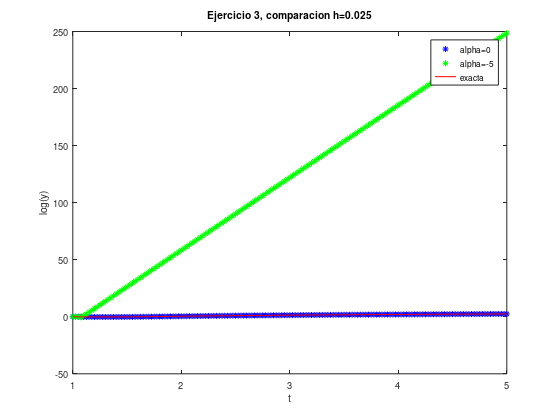

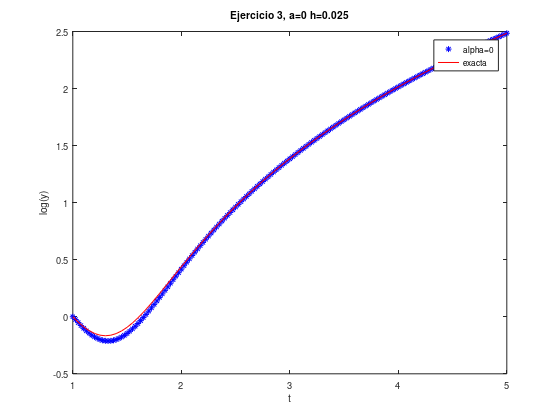

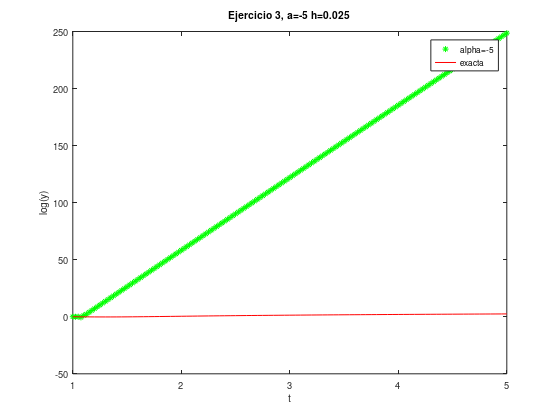

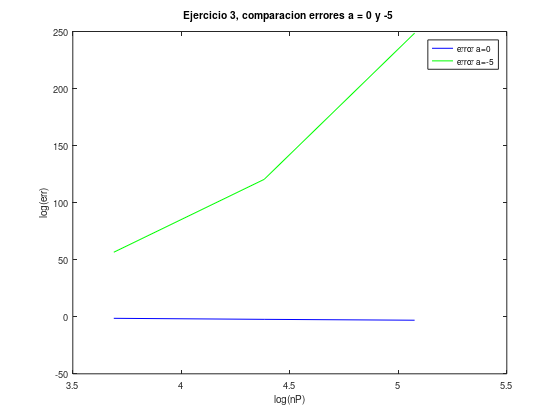

In [8]:
%% Ejercicio 3
%% @author Domingo Méndez
%% Ejecutar desde la carpeta contenedora
  % justo encima de Biblioteca

  clear all;
  close all;
  addpath('../Biblioteca');
  
  % Datos del problema
  f = @(t,y) t.^3-2*t.*y;
  g = @(t) 0.5*(t.^2-ones(1,length(t)))+exp(ones(1,length(t))-t.^2); %exacta
  t0 = 1;
  y0 = 1;
  
  T = 4;
  
  k1 = 2; % Número de pasos
  k2 = 2;
  
  % Multipaso
  coef_a = 0; % Coefs metodo 1 alpha=0
  b0 = 3-coef_a;
  b1 = -(1+coef_a);
  a_1 = [coef_a -(1+coef_a)];
  b_1 = 0.5*[b0 b1];
  
  coef_a = -5; % Coefs metodo 2 alpha = -5
  a_2 = [coef_a -(1+coef_a)];
  b_2 = 0.5*[b0 b1];
  
  h = [0.1 0.05 0.025]; % varios h comparamos
  for l = 1:length(h)
    clear 'tt0';
    N = round(T/h(l));
    tt0 = t0:h(l):t0+T;
    ytrue = g(tt0);
    y0_1 = ytrue(1:k1);
    y0_2 = ytrue(1:k2);
  
    % Resolvemos por los 2 métodos
    [t,y1] = multiPaso(a_1, b_1, k1, f, y0_1, t0, T, N);
    [t,y2] = multiPaso(a_2, b_2, k2, f, y0_2, t0, T, N);
  
    error1(l) = max(abs(ytrue-y1));
    error2(l) = max(abs(ytrue-y2));
  
    figure(1); % Se observa la divergencia del segundo metodo por dos motivos:
    % 1. El metodo no es 0-estable para alpha = -5
    % 2. El metodo es explicito pero el problema es mas o menos rigido:
    % solucion con una exponencial de negativos
  
    ttrue = t0:0.05:t0+T;
    yplot = g(ttrue);
    figure(1)
    plot(t, log(y1), '*b', t, log(y2), '*g', ttrue, log(yplot), '-r');
    xlabel('t');
    ylabel('log(y)');
    legend('alpha=0', 'alpha=-5', 'exacta');
    title(['Ejercicio 3, comparacion h=', num2str(h(l))]);
  
    figure(2)
    plot(t, log(y1), '*b', ttrue, log(yplot), '-r');
    xlabel('t');
    ylabel('log(y)');
    legend('alpha=0', 'exacta');
    title(['Ejercicio 3, a=0 h=', num2str(h(l))]);
  
    figure(3)
    plot(t, log(y2), '*g', ttrue, log(yplot), '-r');
    xlabel('t');
    ylabel('log(y)');
    legend('alpha=-5', 'exacta');
    title(['Ejercicio 3, a=-5 h=', num2str(h(l))]);
  
    disp('Pausa: espera 5s');
    pause(5);
  
    nP(l) = N;
  endfor
  
  pause(2)
  
  %% Dibujamos grafica de los errores para comparar estabilidad
  figure(4);
  plot(log(nP), log(error1), '-b', log(nP), log(error2), '-g');
  hold on;
  legend('error a=0', 'error a=-5', 'Location','Best');
  xlabel('log(nP)');
  ylabel('log(err)');
  title(['Ejercicio 3, comparacion errores a = 0 y -5 ']);
  disp('En la figura observamos que es 0-estable para a=0 pero no para a=-5');
  hold off;
  rmpath('../Biblioteca');